In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Loading the data .
data = pd.read_csv('Employee.csv')

In [ ]:
#printing the head values
data.head()
unique_cities = data['City'].unique()
print(unique_cities)
print(data['LeaveOrNot'].unique())




['Bangalore' 'Pune' 'New Delhi']
[0 1]


In [ ]:
import pandas as pd
print(data['LeaveOrNot'].unique())


# Assuming your DataFrame is named 'data'

# Map values in 'LeaveOrNot' column
data['LeaveOrNot'] = data['LeaveOrNot'].map({0: 'LEFT', 1: 'WORKING'})

print(data['LeaveOrNot'].unique())




[0 1]
['LEFT' 'WORKING']


I tried to use education as Ordinal Encoder, but accuracy was not good. Here is my code:
levels = ['Bachelors', 'Masters', 'PHD']

ordinal_encoder = OrdinalEncoder(categories=[levels])


data['EducationO'] = ordinal_encoder.fit_transform(data[['Education']])


In [ ]:
NullValues=data.isnull().sum()
print(NullValues)

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


There is no null values . So we don't need to drop the any rows

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   object
dtypes: int64(4), object(5)
memory usage: 327.3+ KB


In [ ]:

#adding to y , then dropping the table so we can check our model.
y = data['LeaveOrNot']
X = data.drop('LeaveOrNot', axis=1)

In [ ]:
#spliting the data and training and val sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Spliting  the training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

In [ ]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,LEFT
1,Bachelors,2013,Pune,1,28,Female,No,3,WORKING
2,Bachelors,2014,New Delhi,3,38,Female,No,2,LEFT
3,Masters,2016,Bangalore,3,27,Male,No,5,WORKING
4,Masters,2017,Pune,3,24,Male,Yes,2,WORKING


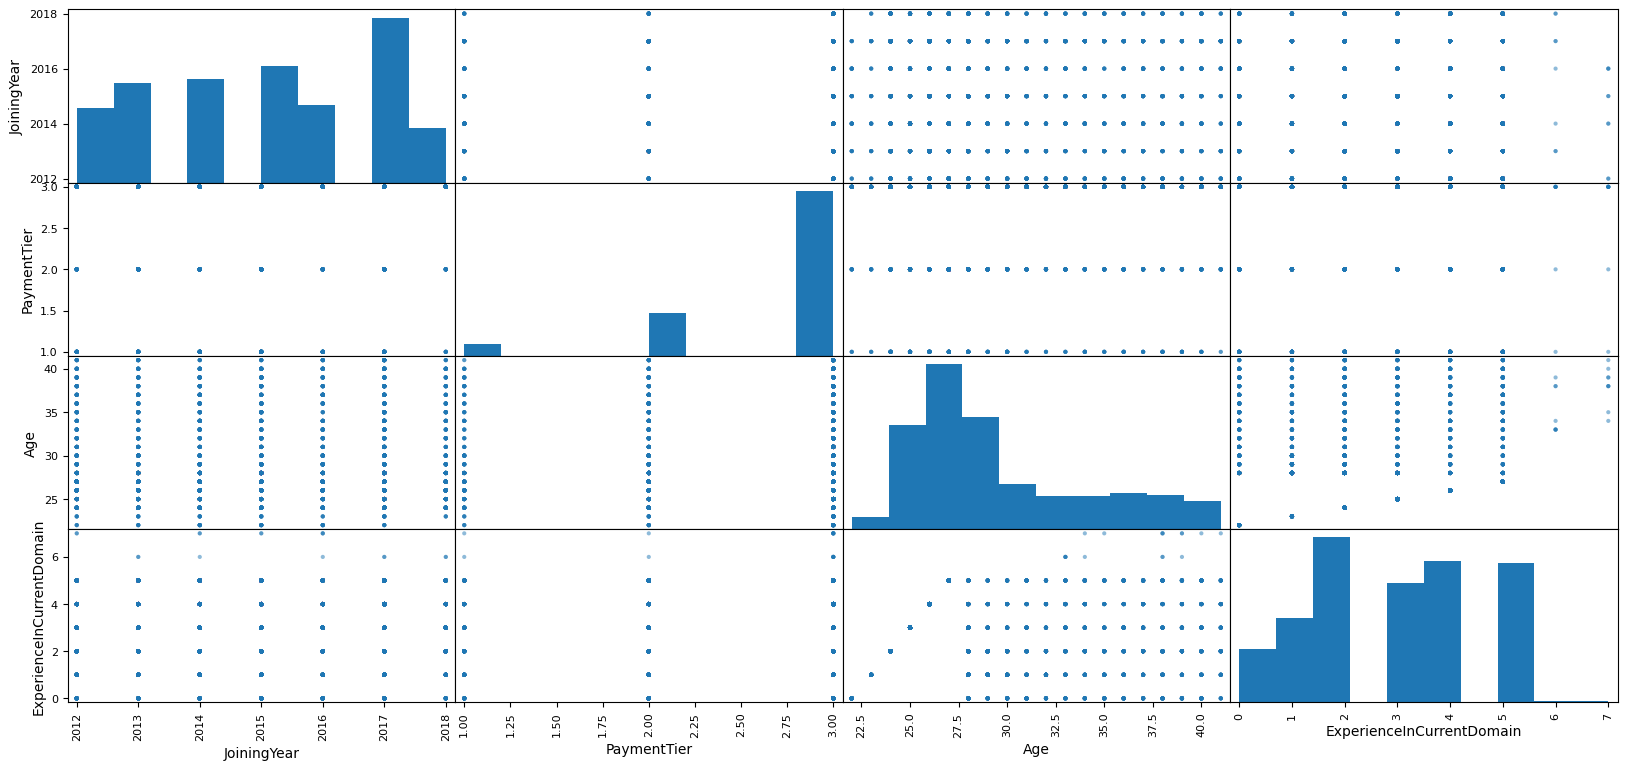

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt


scatter_matrix(data[['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']], figsize=(20,9))
plt.show()

In [ ]:
# the numeric columns are Age, Experience.
#since it has num (Age, Experience )
numeric_columns = ['Age','JoiningYear' ]

onehot: City has no relational values
ordinal :
 Education has 3 levels here,
Payment has 3 tiers here




In [ ]:
categorical_columns_onehot = ['Education', 'City' ,'ExperienceInCurrentDomain']
categorical_columns_ordinal = ['Gender', 'EverBenched',  'PaymentTier']

In [ ]:
standard_scalar = StandardScaler()
standard_scalar.fit_transform(data[numeric_columns])

one_hot_encoder = OneHotEncoder(sparse_output = False)
one_hot_encoder.fit_transform(data[categorical_columns_onehot])

ord_encoder = OrdinalEncoder()
ord_encoder.fit_transform(data[categorical_columns_ordinal])


array([[1., 0., 2.],
       [0., 0., 0.],
       [0., 0., 2.],
       ...,
       [1., 0., 2.],
       [1., 1., 2.],
       [1., 1., 2.]])

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer_onehot = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])

categorical_transformer_ordinal = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])


In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat_onehot', categorical_transformer_onehot, categorical_columns_onehot),
        ('cat_ordinal', categorical_transformer_ordinal, categorical_columns_ordinal)
    ])


logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

logistic_regression_model.fit(X_train, y_train)

#  train a Random Forest model
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

random_forest_model.fit(X_train, y_train)

#  train a K-Nearest Neighbors
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'JoiningYear']),
                                                 ('cat_onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Education', 'City',
                                                   'ExperienceInCurrentDomain']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'EverBenched',
                                                   'PaymentTier'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

logistic = logistic_regression_model.predict(X_val)

ConF_metrics_logistic = confusion_matrix(y_val, logistic)
print("Confusion Matrix for Logistic Regression:")
print(ConF_metrics_logistic)

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_val, logistic))

Confusion Matrix for Logistic Regression:
[[359  41]
 [ 98  61]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        LEFT       0.79      0.90      0.84       400
     WORKING       0.60      0.38      0.47       159

    accuracy                           0.75       559
   macro avg       0.69      0.64      0.65       559
weighted avg       0.73      0.75      0.73       559



In [ ]:

random = random_forest_model.predict(X_val)
ConF_metrics_random = confusion_matrix(y_val, random)
print("Confusion Matrix for Random Forest:")
print('')
print(ConF_metrics_random)

print("\nClassification Report for Random Forest:")
print(classification_report(y_val, random))

Confusion Matrix for Random Forest:

[[371  29]
 [ 56 103]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

        LEFT       0.87      0.93      0.90       400
     WORKING       0.78      0.65      0.71       159

    accuracy                           0.85       559
   macro avg       0.82      0.79      0.80       559
weighted avg       0.84      0.85      0.84       559



In [ ]:
knn = knn_model.predict(X_val)

ConF_metrics_knn = confusion_matrix(y_val, knn)
print("Confusion Matrix for K-Nearest Neighbors (KNN):")
print('')
print(ConF_metrics_knn)
print("\nClassification Report for K-Nearest Neighbors (KNN):")
print(classification_report(y_val, knn))

Confusion Matrix for K-Nearest Neighbors (KNN):

[[359  41]
 [ 77  82]]

Classification Report for K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

        LEFT       0.82      0.90      0.86       400
     WORKING       0.67      0.52      0.58       159

    accuracy                           0.79       559
   macro avg       0.75      0.71      0.72       559
weighted avg       0.78      0.79      0.78       559



Based on Accuracy I choose Random Forest

In [ ]:
Random  = random_forest_model.predict(X_test)

metrics_Random = confusion_matrix(y_test, Random)
print("Confusion Matrix for Random Forest on the Test Set:")
print('')
print(metrics_Random)
print("\nClassification Report for Random Forest on the Test Set:")
print(classification_report(y_test, Random))

Confusion Matrix for Random Forest on the Test Set:

[[563  47]
 [ 92 229]]

Classification Report for Random Forest on the Test Set:
              precision    recall  f1-score   support

        LEFT       0.86      0.92      0.89       610
     WORKING       0.83      0.71      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931

